In [7]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from random import random
from scipy.special import comb
import scipy as sp

sns.set(style='ticks', color_codes = True)


import warnings
warnings.filterwarnings(action='ignore')

In [4]:
df = pd.read_csv(os.path.join('data', 'StudentsPerformance.csv'))
df.shape

(1000, 8)

<AxesSubplot:ylabel='Density'>

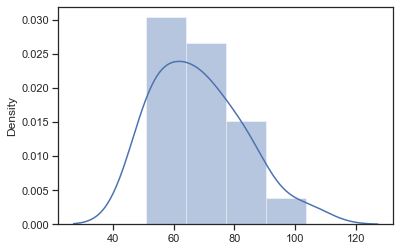

In [8]:
# scipy  random sample for normalisation
# df['math score'].mean() 값을 따르는 샘플
examples = sp.stats.norm.rvs(size = 100000, loc=df['math score'].mean(), scale=df['math score'].std())
samples = np.random.choice(examples, 20)


sns.distplot(samples)

In [6]:
mean_list = list()
for _ in range(100):
    mean_list.append(np.random.choice(examples, 20).mean())
    
len(mean_list)

100

<AxesSubplot:ylabel='Density'>

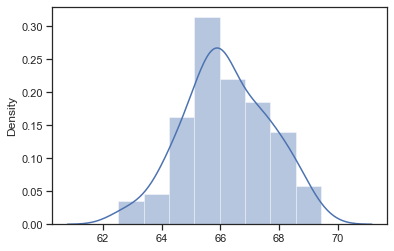

In [14]:
sns.distplot(mean_list, bins=8)

In [15]:
mean_list = list()
for _ in range(10000):
    mean_list.append(np.random.choice(examples, 20).mean())
    
len(mean_list)

10000

<AxesSubplot:ylabel='Density'>

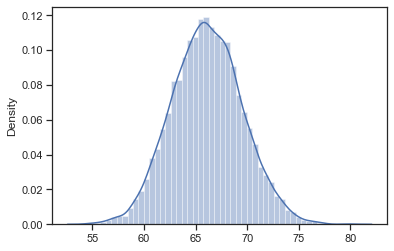

In [16]:
sns.distplot(mean_list)

In [18]:
mean_list = list()
for _ in range(100000):
    mean_list.append(np.random.choice(examples, 100).mean())
    
len(mean_list)

100000

<AxesSubplot:ylabel='Density'>

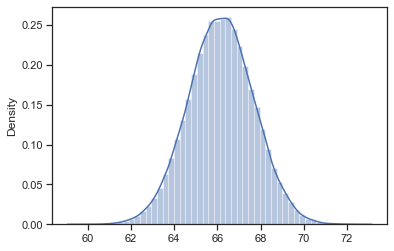

In [19]:
sns.distplot(mean_list)

In [21]:
# 표본에서 뽑은 평균 값의 집합 데이터리스트가, 원 값의 평균 값이랑 비슷하게 추출 된다!
np.mean(mean_list), df['math score'].mean()

(66.16338291704156, 66.089)

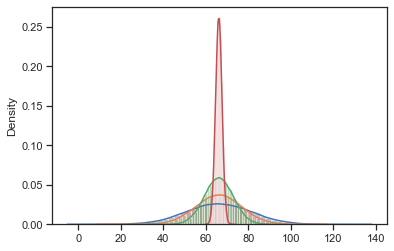

In [22]:
for n in [1,2,5,100]:
    avg_list = list()
    for _ in range(100000):
        avg_list.append(np.random.choice(examples, n).mean())
    sns.distplot(avg_list, )
    
# 샘플을 많이 뽑을 수록 샘플 평균 분포의 min, max가 줄어든다 ( 좁은 범위에서 생성됨 )
# n이 크면 클 수록 표본이 가질 수 있는 오류의 범위가 줄어듦
# 데이터를 많이 뽑으면 평균값이 줄어듦

### 분포 별 중심극한정리

In [23]:
avg_list = list()
for _ in range(100000):
    avg_list.append(np.random.choice(df['math score'], 50).mean())
    
len(avg_list)

100000

<AxesSubplot:ylabel='Density'>

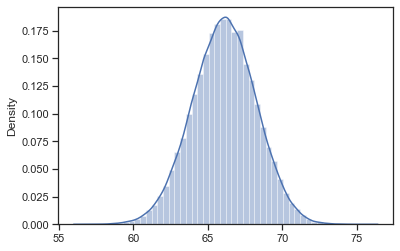

In [24]:
sns.distplot(avg_list)

In [25]:
df = pd.read_csv(os.path.join('data', 'football_games.csv'))
df.shape

(41876, 9)

In [26]:
korea_condition = (df['home_team'].str.contains('South Korea') | (df['away_team'].str.contains('South Korea')))
df_a = df[df['home_team'].str.contains("South Korea")][['date', 'home_score']]
df_b = df[df['away_team'].str.contains("South Korea")][['date', 'away_score']]

df_korea = pd.concat([df_a, df_b])
df_korea['score'] = df_korea['away_score'].add(df_korea['home_score'], fill_value = 0)
df_korea = df_korea[['date', 'score']]

<AxesSubplot:xlabel='score'>

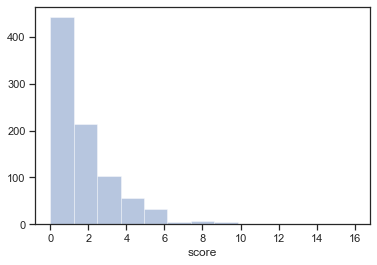

In [28]:
# 포아송 분포 형태? 
sns.distplot(df_korea['score'], bins=13, kde=False)

<AxesSubplot:>

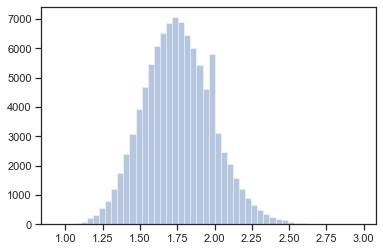

In [31]:
avg_list = list()
for _ in range(100000):
    avg_list.append(np.random.choice(df_korea['score'], 50).mean())
    
sns.distplot(avg_list, kde=False)